Found 237 validated image filenames belonging to 4 classes.
Found 59 validated image filenames belonging to 4 classes.


C:\Users\monis\AppData\Roaming\Python\Python311\site-packages\keras\src\legacy\preprocessing\image.py:920: UserWarning: Found 3 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.
  warnings.warn(
C:\Users\monis\AppData\Roaming\Python\Python311\site-packages\keras\src\legacy\preprocessing\image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.
  warnings.warn(
C:\Users\monis\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/5


C:\Users\monis\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 78s 8s/step - accuracy: 0.3299 - loss: 1.8210 - val_accuracy: 0.5932 - val_loss: 0.7422
Epoch 2/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 63s 7s/step - accuracy: 0.5546 - loss: 0.8539 - val_accuracy: 0.5424 - val_loss: 0.8055
Epoch 3/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 67s 8s/step - accuracy: 0.5933 - loss: 0.7490 - val_accuracy: 0.5424 - val_loss: 0.6501
Epoch 4/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 64s 7s/step - accuracy: 0.6257 - loss: 0.7071 - val_accuracy: 0.7288 - val_loss: 0.6272
Epoch 5/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 63s 7s/step - accuracy: 0.6548 - loss: 0.6223 - val_accuracy: 0.6610 - val_loss: 0.6200
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.7011 - loss: 0.5688


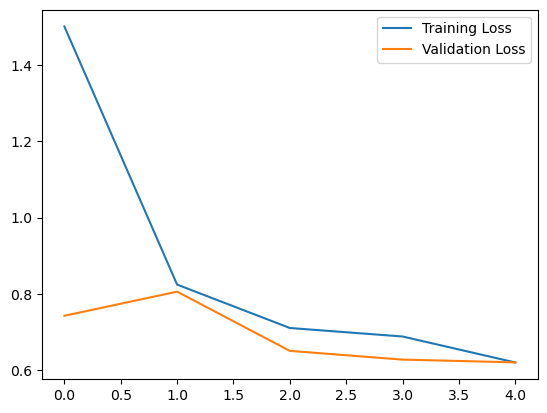

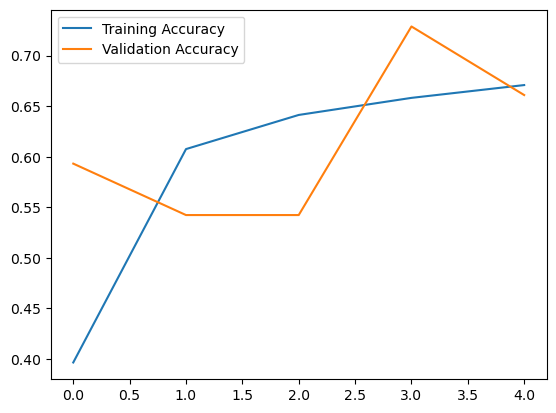

<Figure size 640x480 with 0 Axes>

In [24]:
import pandas as pd
import os
import numpy as np
from sklearn.model_selection import train_test_split
from keras.src.legacy.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img, img_to_array
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import plot_model
from PIL import Image
import matplotlib.pyplot as plt
from keras.models import load_model
from sklearn.metrics import confusion_matrix
import itertools
import tkinter as tk
from tkinter import filedialog

# Create an empty dataframe
data = pd.DataFrame(columns=['image_path', 'label'])

# Define the labels/classes
labels = {'kaggle/input/satellite-image-classification/data/cloudy' : 'Cloudy',
          'kaggle/input/satellite-image-classification/data/desert' : 'Desert',
          'kaggle/input/satellite-image-classification/data/green_area' : 'Green_Area',
          'kaggle/input/satellite-image-classification/data/water' : 'Water',
           }

# Loop over the train, test, and val folders and extract the image path and label
for folder in labels:
    for image_name in os.listdir(folder):
        image_path = os.path.join(folder, image_name)
        label = labels[folder]
        data = pd.concat([data, pd.DataFrame({'image_path': [image_path], 'label': [label]})], ignore_index=True)

# Save the data to a CSV file
data.to_csv('kaggle/working/image_dataset.csv', index=False)

# Load the dataset
df = pd.read_csv("kaggle/working/image_dataset.csv")

# Split the dataset into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Pre-process the data
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   rotation_range=45,
                                   vertical_flip=True,
                                   fill_mode='nearest')


test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(dataframe=train_df,
                                                    x_col="image_path",
                                                    y_col="label",
                                                    target_size=(255, 255),
                                                    batch_size=32,
                                                    class_mode="categorical")

test_generator = test_datagen.flow_from_dataframe(dataframe=test_df,
                                                  x_col="image_path",
                                                  y_col="label",
                                                  target_size=(255, 255),
                                                  batch_size=32,
                                                  class_mode="categorical")

# Build a deep learning model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(255, 255, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_generator, epochs=5, validation_data=test_generator)

num_samples = test_df.shape[0]
score = model.evaluate(test_generator,
                       steps=num_samples//32+1,
                       )

# Plot the loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# Plot the accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

model.save('Model.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


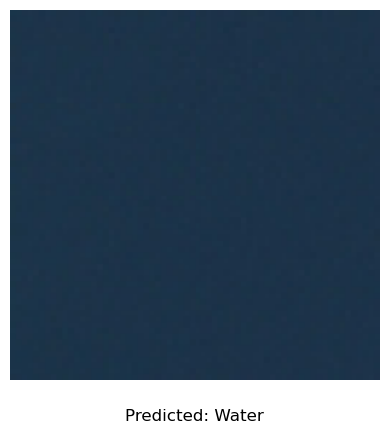

In [31]:
import numpy as np
from keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model
import matplotlib.pyplot as plt

# Load the trained model
model = load_model("Model.h5")

# Define the class names
class_names = ['Cloudy', 'Desert', 'Green_Area', 'Water']

# Load an image from the test set
img = load_img("kaggle/input/satellite-image-classification/data/water/SeaLake_21.jpg", target_size=(255, 255))

# Convert the image to an array
img_array = img_to_array(img)
img_array.shape
img_array = img_array / 255.0
img_array = np.reshape(img_array, (1, 255, 255, 3))

# Get the model predictions
predictions = model.predict(img_array)

# Get the class index with the highest predicted probability
class_index = np.argmax(predictions[0])

# Get the predicted class label
predicted_label = class_names[class_index]

# Display the resized image with predicted text below
fig, ax = plt.subplots()
ax.imshow(img)
ax.axis('off')  # Hide axis

# Add predicted text below the image
ax.text(0.5, -0.1, "Predicted: {}".format(predicted_label), transform=ax.transAxes,
        horizontalalignment='center', verticalalignment='center', fontsize=12)

plt.show()